In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [51]:
# Identify categorical columns (excluding the target 'Recurred')
categorical_cols = X.select_dtypes(include='object').columns.tolist()
print(f"Categorical columns identified: {categorical_cols}")

# Perform one-hot encoding on categorical columns
X_processed = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\nFirst 5 rows of the processed features (X_processed):")
display(X_processed.head())
print("\nShape of processed features:", X_processed.shape)

Categorical columns identified: ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

First 5 rows of the processed features (X_processed):


,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,34,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,30,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,62,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,62,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False



Shape of processed features: (383, 40)


In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of training target:", y_train.shape)
print("Shape of testing target:", y_test.shape)

Shape of training features: (268, 40)
Shape of testing features: (115, 40)
Shape of training target: (268,)
Shape of testing target: (115,)


### Model Training

In [45]:
# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_clf.fit(X_train, y_train)

# Train Random Forest Classifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=0)
forest_clf.fit(X_train, y_train)

print("Models trained.")

Models trained.


In [46]:
# Predict on the test set
y_pred_tree = tree_clf.predict(X_test)
y_pred_forest = forest_clf.predict(X_test)

# Evaluate Decision Tree
acc_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print("Decision Tree Performance:")
print(f"Accuracy: {acc_tree:.4f}")
print("Classification Report:")
print(report_tree)

# Evaluate Random Forest
acc_forest = accuracy_score(y_test, y_pred_forest)
report_forest = classification_report(y_test, y_pred_forest)

print("\nRandom Forest Performance:")
print(f"Accuracy: {acc_forest:.4f}")
print("Classification Report:")
print(report_forest)

Decision Tree Performance:
Accuracy: 0.9391
Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.94      0.96        83
         Yes       0.86      0.94      0.90        32

    accuracy                           0.94       115
   macro avg       0.92      0.94      0.93       115
weighted avg       0.94      0.94      0.94       115


Random Forest Performance:
Accuracy: 0.9739
Classification Report:
              precision    recall  f1-score   support

          No       0.99      0.98      0.98        83
         Yes       0.94      0.97      0.95        32

    accuracy                           0.97       115
   macro avg       0.96      0.97      0.97       115
weighted avg       0.97      0.97      0.97       115



### Decision Tree Visualization

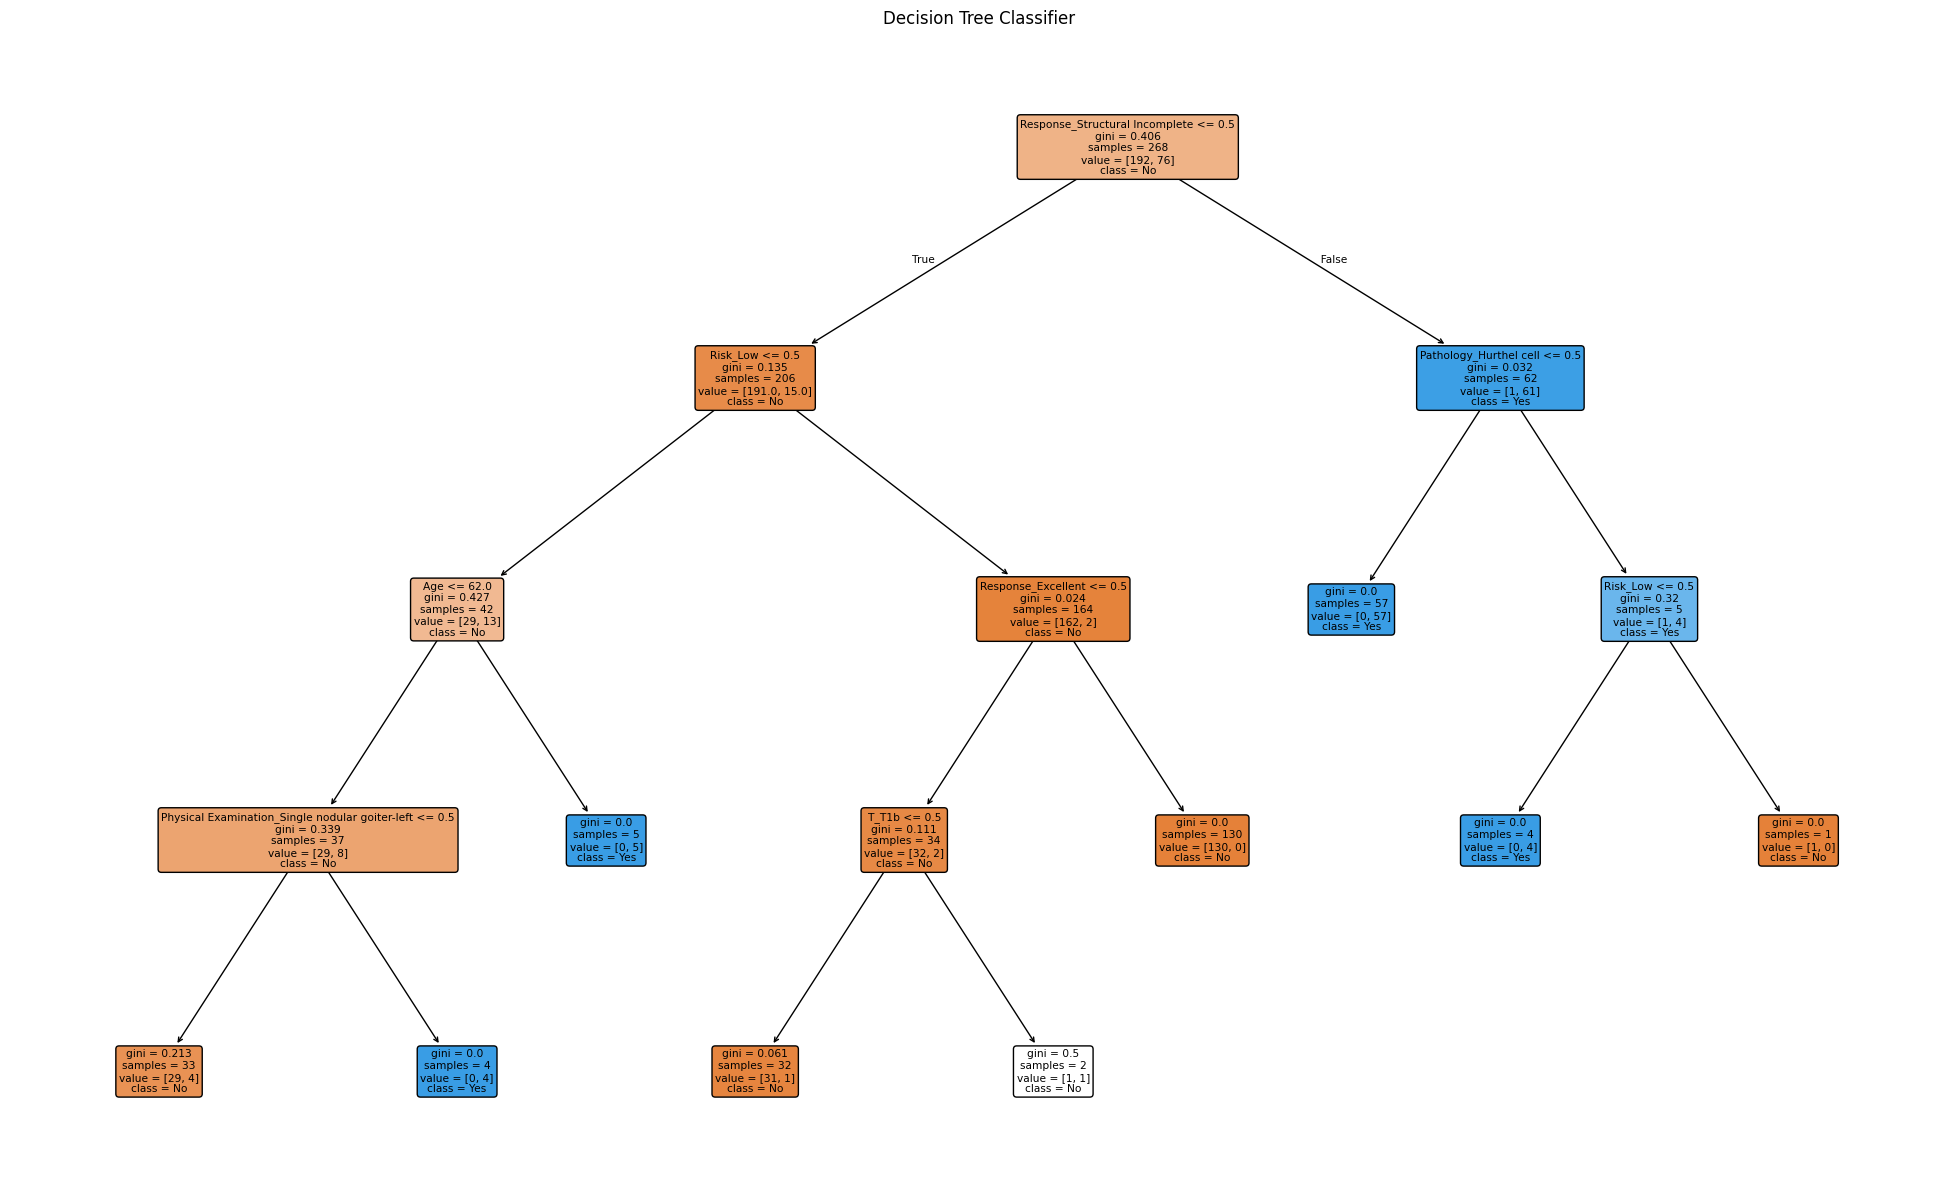

In [47]:
# Visualize Decision Tree
plt.figure(figsize=(25, 15))
plot_tree(tree_clf, feature_names=X_processed.columns.tolist(), class_names=y.unique().tolist(), filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

In [48]:
print(f"Decision Tree Accuracy: {acc_tree:.4f}")
print(f"Random Forest Accuracy: {acc_forest:.4f}")

Decision Tree Accuracy: 0.9391
Random Forest Accuracy: 0.9739
